In [1]:
from load_data import load_data
from one_hot_encode import one_hot_encode
from NeuralNetwork import NeuralNetwork
from Trainer import Trainer
from ModelEvaluator import ModelEvaluator
import numpy as np

In [2]:
train_dir = "data/pokemon-dataset-1000/train"
val_dir = "data/pokemon-dataset-1000/val"
test_dir = "data/pokemon-dataset-1000/test"

In [3]:
image_size = (128, 128)
X_train, y_train, class_names = load_data(data_dir=train_dir, image_size=image_size)
X_val, y_val, _ = load_data(data_dir=val_dir, image_size=image_size)
X_test, y_test, _ = load_data(data_dir=test_dir, image_size=image_size)

Wczytywanie obrazu oraz normalizacja wartosci pixeli do [0, 1]. 
Tworzenie listy obrazów oraz odpowiadajacych im etykiet.

In [4]:
num_classes = len(class_names)
y_train = one_hot_encode(labels=y_train, num_classes=num_classes)
y_val = one_hot_encode(labels=y_val, num_classes=num_classes)
y_test = one_hot_encode(labels=y_test, num_classes=num_classes)

Encode etykiet

In [5]:
reduce_size = 7770
train_indices = np.random.choice(X_train.shape[0], size=reduce_size, replace=False)
X_train = X_train[train_indices]
y_train = y_train[train_indices]

In [6]:
print(f"Liczba klas: {num_classes}")
print(f"Rozmiar zbioru treningowego: {X_train.shape}")
print(f"Rozmiar zbioru walidacyjnego: {X_val.shape}")
print(f"Rozmiar zbioru testowego: {X_test.shape}")

Liczba klas: 1000
Rozmiar zbioru treningowego: (7770, 128, 128, 3)
Rozmiar zbioru walidacyjnego: (2379, 128, 128, 3)
Rozmiar zbioru testowego: (3239, 128, 128, 3)


In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [8]:
input_size = X_train_flat.shape[1]
hidden_size = 1024
output_size = num_classes
model = NeuralNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
trainer = Trainer(model=model, learning_rate=0.05, epochs=1000)
trainer.train(X_train_flat, y_train, X_val_flat, y_val)

Epoka 1/1000, Błąd modelu: 6.9254, Przeuczenie: 6.9317
Epoka 101/1000, Błąd modelu: 6.0399, Przeuczenie: 7.4562
Epoka 201/1000, Błąd modelu: 5.0919, Przeuczenie: 7.8559
Epoka 301/1000, Błąd modelu: 4.1085, Przeuczenie: 8.4470
Epoka 401/1000, Błąd modelu: 3.2993, Przeuczenie: 9.1161
Epoka 501/1000, Błąd modelu: 2.6607, Przeuczenie: 9.7488
Epoka 601/1000, Błąd modelu: 2.1599, Przeuczenie: 10.3131
Epoka 701/1000, Błąd modelu: 1.7704, Przeuczenie: 10.8152
Epoka 801/1000, Błąd modelu: 1.4622, Przeuczenie: 11.2587
Epoka 901/1000, Błąd modelu: 1.2193, Przeuczenie: 11.6468


Dokładność na zbiorze testowym: 45.26%


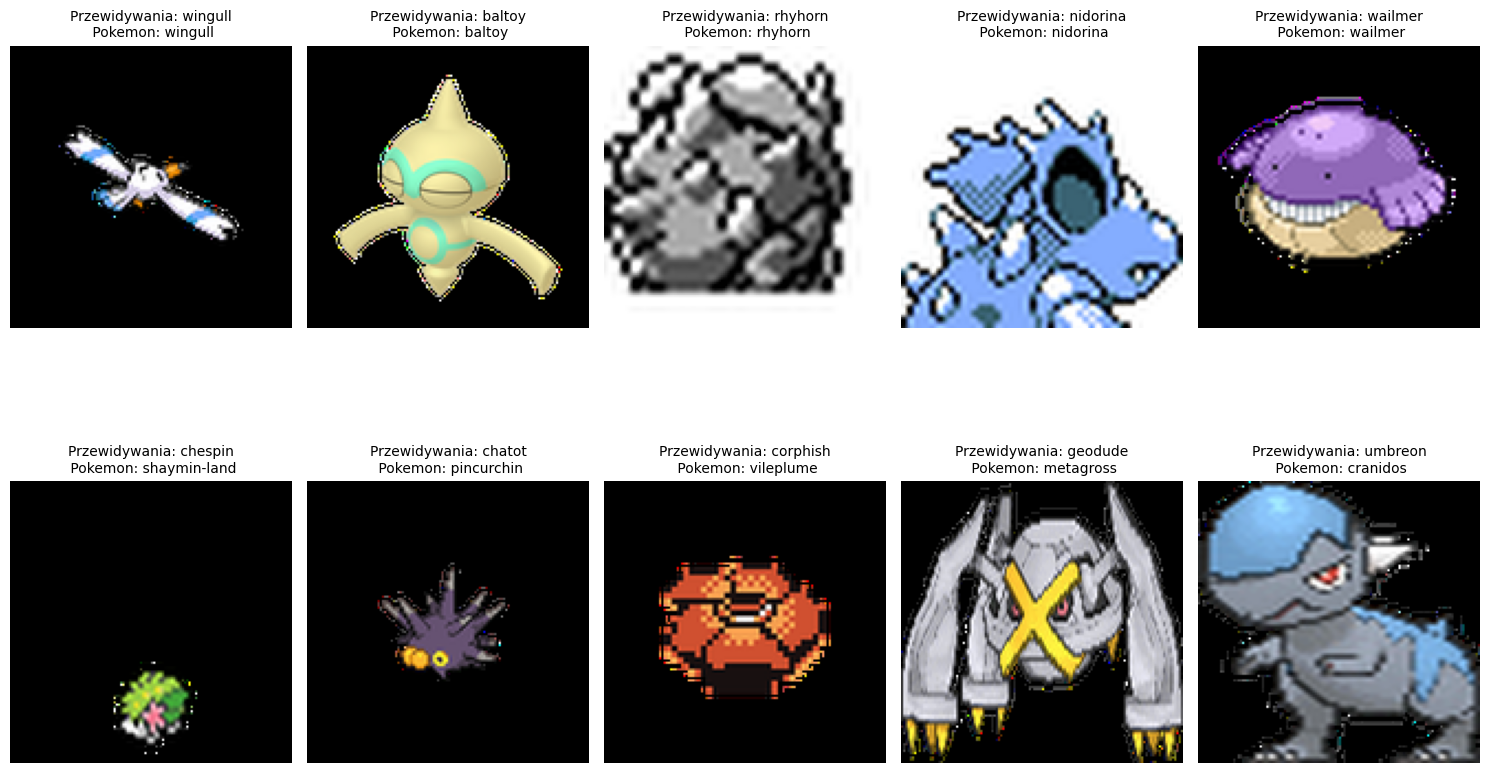

In [9]:
evaluator = ModelEvaluator(model, class_names)
test_predictions = evaluator.predict(X_test_flat)

test_accuracy = evaluator.calculate_accuracy(test_predictions, y_test)
print(f"Dokładność na zbiorze testowym: {test_accuracy:.2%}")

evaluator.visualize_predictions(X_test, test_predictions, y_test, num_samples=10)